## Prediction model for side effects of drugs

In [ ]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
import sklearn as skl

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drugsideeffects.csv to drugsideeffects.csv


In [ ]:
# importing data set in to python envirinment
pd.set_option("display.max_columns", None)
data=pd.read_csv('drugsideeffects.csv')

In [ ]:
data.shape

(308352, 5)

In [ ]:
#display data
data

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
...,...,...,...,...,...
308347,differin,8,Considerably Effective,acne,Mild Side Effects
308348,imitrex,8,Considerably Effective,migraines,Mild Side Effects
308349,prilosec,10,Highly Effective,acid reflux,No Side Effects
308350,fosamax,1,Ineffective,possible osteoporosis,Extremely Severe Side Effects


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308352 entries, 0 to 308351
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   urlDrugName    308352 non-null  object
 1   rating         308352 non-null  int64 
 2   effectiveness  308352 non-null  object
 3   condition      308256 non-null  object
 4   sideEffects    308352 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.8+ MB


In [ ]:
data.nunique()

urlDrugName       502
rating             10
effectiveness       5
condition        1426
sideEffects         5
dtype: int64

In [ ]:
data.value_counts(['rating'])

rating
10        73587
8         55473
9         47580
7         34710
1         30195
5         15804
6         15747
3         14376
4         10677
2         10203
dtype: int64

In [ ]:
data.value_counts(['effectiveness'])

effectiveness         
Highly Effective          131760
Considerably Effective     92283
Moderately Effective       41235
Ineffective                24552
Marginally Effective       18522
dtype: int64

In [ ]:
data.value_counts(['sideEffects'])

sideEffects                  
Mild Side Effects                101454
No Side Effects                   92160
Moderate Side Effects             60819
Severe Side Effects               36699
Extremely Severe Side Effects     17220
dtype: int64

In [ ]:
data.value_counts(['urlDrugName'])

urlDrugName
lexapro        6303
prozac         4581
zoloft         4500
retin-a        4440
propecia       3828
               ... 
proloprim        96
bystolic         96
hytrin           96
hyoscyamine      96
zyvox            96
Length: 502, dtype: int64

In [ ]:
data.dtypes

urlDrugName      object
rating            int64
effectiveness    object
condition        object
sideEffects      object
dtype: object

##Exploratory Data Analysis

###Univariate Analysis

Text(0, 0.5, 'Counts')

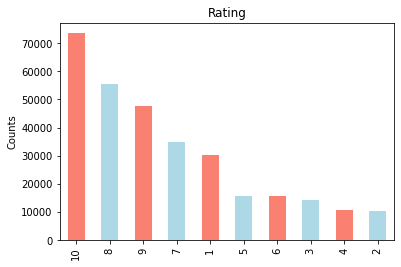

In [ ]:
data["rating"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);
plt.title("Rating")
plt.ylabel("Counts")

-- rating

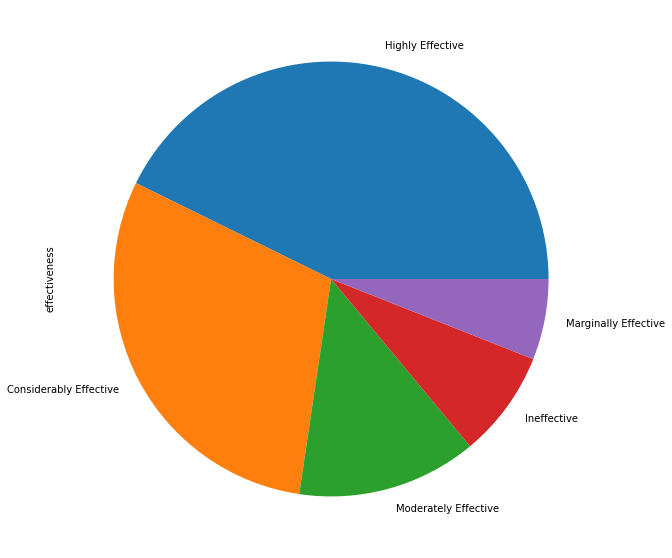

In [ ]:
data.effectiveness.value_counts().plot(kind="pie",figsize=(16,10))

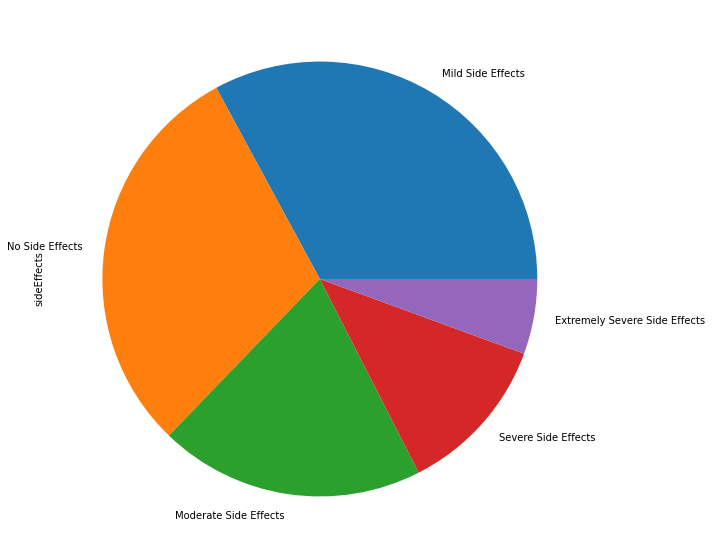

In [ ]:
data.sideEffects.value_counts().plot(kind="pie",figsize=(16,10))

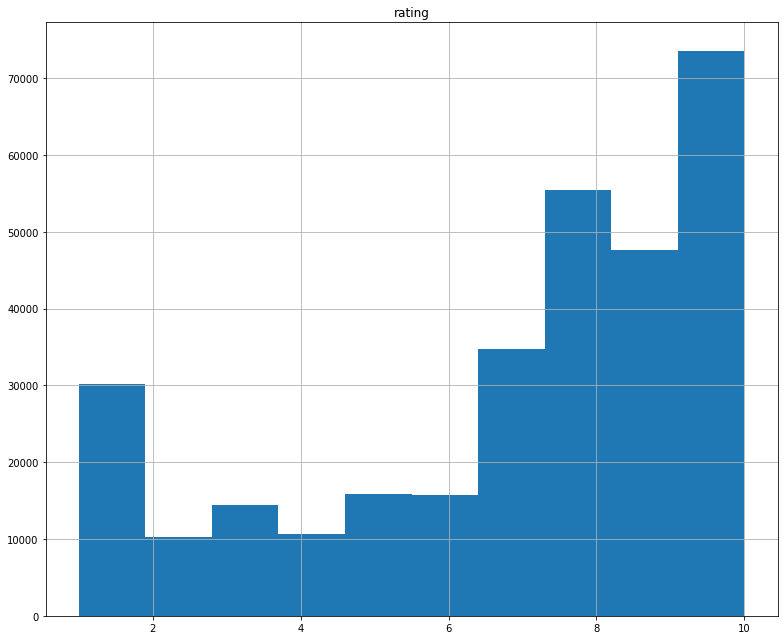

In [ ]:
#frequency graph of dataset
freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(11,9))
plt.tight_layout()
plt.show()

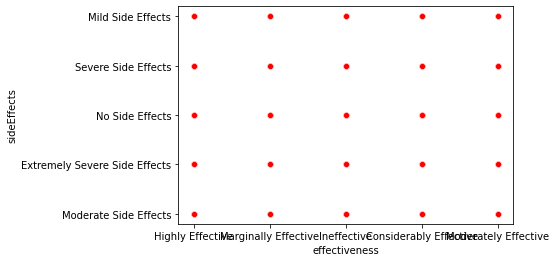

In [ ]:
sns.scatterplot(data['effectiveness'],data['sideEffects'],color="red")

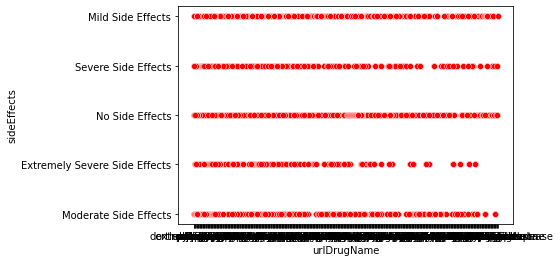

In [ ]:
sns.scatterplot(data['urlDrugName'],data['sideEffects'],color="red")

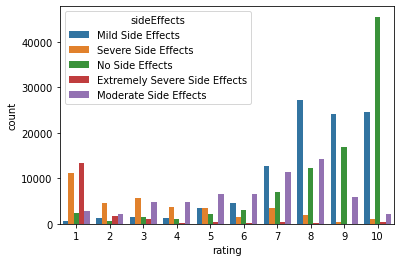

In [ ]:
sns.countplot(x="rating",data=data,hue="sideEffects")

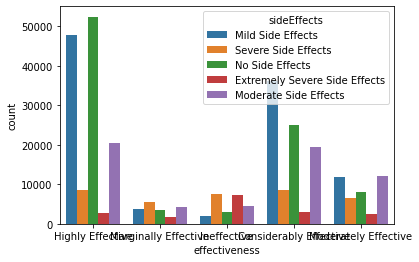

In [ ]:
sns.countplot(x="effectiveness",data=data,hue="sideEffects")
sns.set(rc={"figure.figsize":(20, 7)})

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data, title='data', explorative=True)
#profile

# 3. Data pre-processing

### 1. Missing value handiling

In [ ]:
#Checking for null values
data.isna().sum()

urlDrugName       0
rating            0
effectiveness     0
condition        96
sideEffects       0
dtype: int64

In [ ]:
data.value_counts(['condition'])

condition                                        
depression                                           23601
acne                                                 16485
anxiety                                               6198
insomnia                                              5364
birth control                                         4824
                                                     ...  
heart palpitations                                      96
heart problem                                           96
heavy menses                                            96
heavy period                                            96
inflammation of throat during bacteria bronchitis       96
Length: 1426, dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)


In [ ]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

### 2.Outlier detection

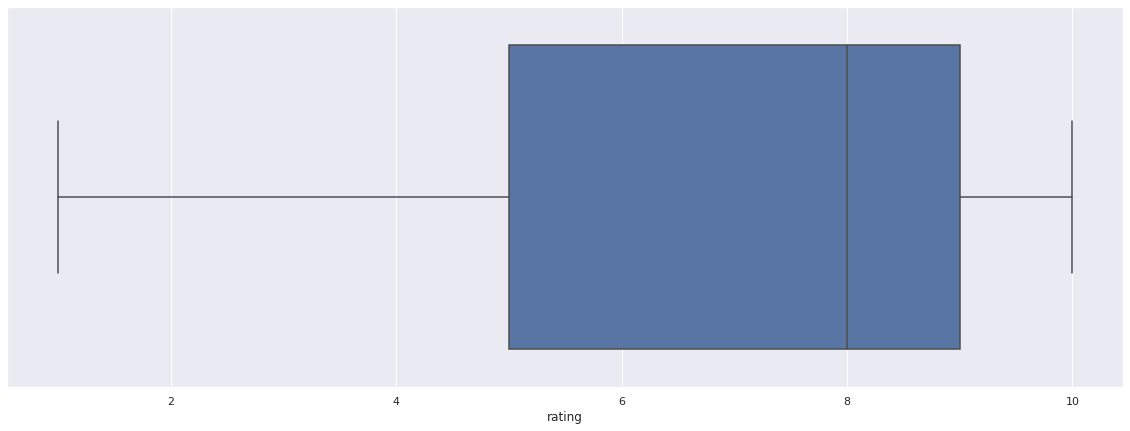

In [ ]:
# Outlier detection using boxplot
for i in ['rating']:
  sns.boxplot(x=data[i])
  plt.show()

###3.Encoding

In [ ]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
#creating an instance LabelEncoder
label_en =LabelEncoder()
a=["urlDrugName","effectiveness","condition","sideEffects"]
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

###4. Standardization

In [ ]:
#Splitting the data
y=data["sideEffects"]
x=data.drop(['sideEffects'],axis=1)

In [ ]:
#importing StandardScaler
from sklearn import preprocessing
#creating an instance StandardScaler
stdr = preprocessing.StandardScaler()
x=stdr.fit_transform(x)

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
#split the Dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(231192, 4)
(231192,)
(77064, 4)
(77064,)


##3.Model Building

###1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9567242811169937
precision is : 0.9572816516219256
recall is : 0.9599498231448408
F1 score is : 0.9585251729129769


In [ ]:
t=[]
t.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


###2.Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred= logit_model.predict(x_test)

In [ ]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.4760069552579674
Precision is: 0.4688172757639987
Recall is : 0.4416127738787733
f1 score is: 0.44771511961210103


In [ ]:
t.append(['Logistic regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


###3. Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:

print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.4760069552579674
precision is : 0.4688172757639987
recall is : 0.4416127738787733
F1 score is : 0.44771511961210103


In [ ]:
t.append(['Gaussian',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


###4. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [ ]:

print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9568410671649538
precision is : 0.9569460499738515
recall is : 0.9603479737878565
F1 score is : 0.9585185665846968


In [ ]:
t.append(['Decision Tree',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### 5.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred= classifier.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

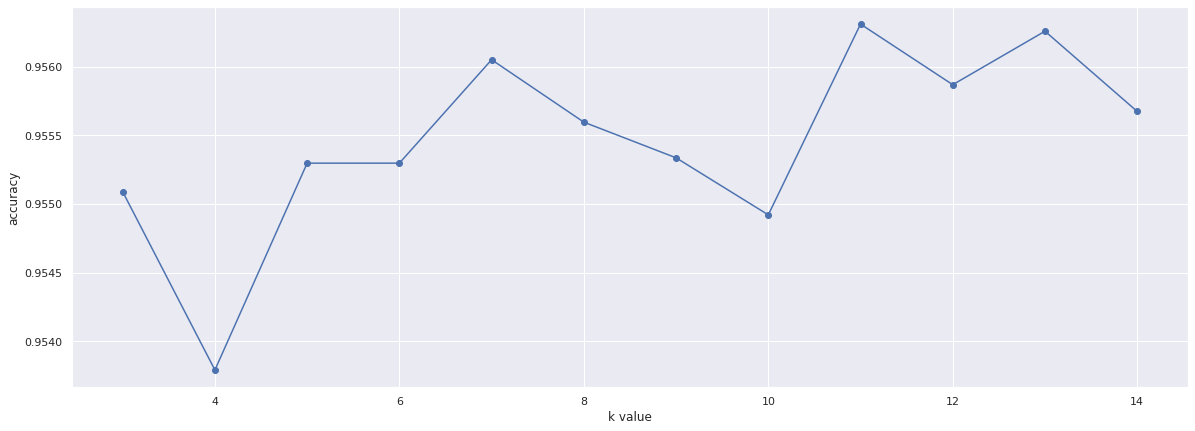

In [ ]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=11, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

In [ ]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9563090418353576
precision is : 0.9577722857589086
recall is : 0.958638003931056
F1 score is : 0.9581725872834831


In [ ]:
t.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


##6. Gradient Booster

In [ ]:
#Gradient Booster
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)
y_pred=gm.predict(x_test)

In [ ]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.6364190802449912
precision is : 0.6433707209495977
recall is : 0.6433549285026903
F1 score is : 0.6409117171779279


In [ ]:
t.append(['Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


##7. Extreme Gradient Booster

In [ ]:
#Extreme Gradient Booster
from xgboost import
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [ ]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.5906778781272708
precision is : 0.5865989377381394
recall is : 0.5910288072699396
F1 score is : 0.5844760703164459


In [ ]:
t.append(['Extreme Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


##4. Fine Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [4,6,8,10,12],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
g_res.best_score_

0.9564907090210735

In [ ]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
y_pred=knn.fit(x_train, y_train)
# get a prediction
y_pred=knn.predict(x_test)

In [ ]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9554915394996366
precision is : 0.9597872918910518
recall is : 0.9569455343118702
F1 score is : 0.9582216516972402


In [ ]:
t.append(['KNN Fine Tuning',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [ ]:
df = pd.DataFrame(t, columns = ['Algorithms', 'F1-Score','Accuracy','Precision','Recall'])
df

,Algorithms,F1-Score,Accuracy,Precision,Recall
0,Random Forest,0.95853,0.95672,0.95728,0.95995
1,Logistic regression,0.44772,0.47601,0.46882,0.44161
2,Gaussian,0.44772,0.47601,0.46882,0.44161
3,Decision Tree,0.95852,0.95684,0.95695,0.96035
4,KNN,0.95817,0.95631,0.95777,0.95864
5,Gradient Booster,0.64091,0.63642,0.64337,0.64335
6,Extreme Gradient Booster,0.58448,0.59068,0.58660,0.59103
7,KNN Fine Tuning,0.95822,0.95549,0.95979,0.95695


In [ ]:
v = pd.DataFrame({'Predicted Data': y_pred, 'Test Data' : y_test})
v.sample(10)

,Predicted Data,Test Data
173000,1,1
76857,3,3
198765,3,3
236177,2,2
147281,0,0
229324,0,0
151323,3,3
83028,1,1
37675,3,3
223225,1,1


After passing through different models, accuracy of KNN is high as compared to others. Therefore, KNN is choosen as the best model for predicting side effects of drugs dataset.

